### Imports and Vars

In [ ]:
import json

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [83]:
# image_file = "/home/dmitry/Pictures/pixels3.jpg"
# image_file = "/home/dmitry/Pictures/pixels2.jpeg"
image_file = "/home/dmitry/Pictures/Wallpapers/wallpaper1.jpg"

### RGB original image

In [84]:
image_origin = cv2.imread(image_file)
image_rgb = cv2.cvtColor(image_origin, cv2.COLOR_BGR2RGB) / 255

Shape: (2880, 5120, 3)


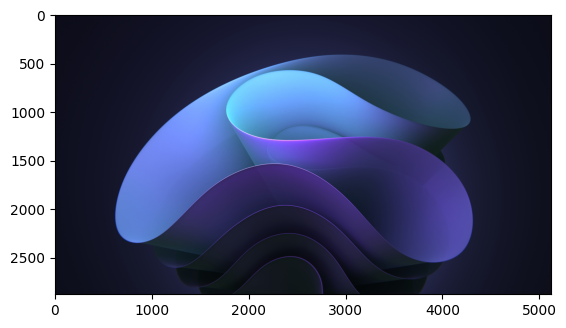

In [85]:
HEIGHT, WIDTH, _ = image_rgb.shape
print("Shape:", image_rgb.shape)
plt.imshow(image_rgb)

### HSV image

##### Opening

In [86]:
image_hsv = cv2.cvtColor(image_origin, cv2.COLOR_BGR2HSV).astype(np.float64)
image_hsv[..., 0] /= 179
image_hsv[..., 0] *= 360
image_hsv[..., 1:] /= 255

##### Minimize

New shape: (576, 1024, 3)


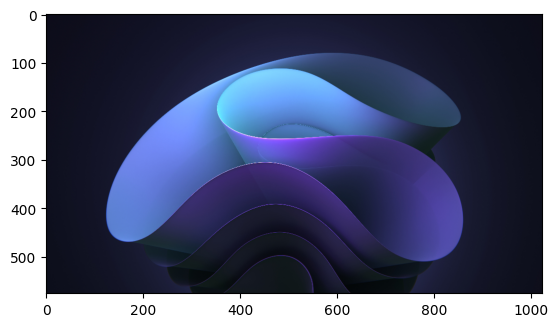

In [87]:
max_side = max(WIDTH, HEIGHT)
needable_size = 1000

if max_side > 2 * needable_size:
    scale = max_side // needable_size

    image_rgb_min = image_rgb[1:(HEIGHT - 1):5, 1:(WIDTH - 1):5, :]
    image_hsv_min = image_hsv[1:(HEIGHT - 1):5, 1:(WIDTH - 1):5, :]
else:
    image_hsv_min = image_hsv
    image_rgb_min = image_rgb

print("New shape:", image_hsv_min.shape)
plt.imshow(image_rgb_min)

### Body

In [88]:
class Colors:
    def __init__(self, path: str | None = None):
        self.palette = {}
        self.color_names = []
        if path is not None:
            self.load(path)

    def __getitem__(self, idx: str | int) -> dict:
        return self.palette[idx]

    def load(self, path: str) -> None:
        with open(path, "r") as json_file:
            data = json.load(json_file)
            for color in data:
                self.add(name=color["name"],
                         hex_col=color["hex"],
                         hue=color["hue"])
                self.color_names.append(color["name"])

    def add(self, name: str, hex_col: str, hue: int) -> None:
        if name in self.palette.keys():
            return
        
        color = {
            "name": name,
            "hex": hex_col,
            "hue": hue
        }
        self.palette[name] = color
        self.palette[hex_col] = color
        self.palette[hue] = color
        
        self.color_names.append(name)
        

def draw_color_lines(ax, colors):
    for name in colors.color_names:
        color = colors[name]
        ax.axvline(x=color["hue"], color=color["hex"], linestyle="--", linewidth=2)

In [89]:
colors = Colors("src/base-colors.json")

In [ ]:

differences = np.abs(arr - target)

closest_indices = np.argpartition(differences, n)[:n]

print(closest_indices)

# closest_indices = closest_indices[np.argsort(differences[closest_indices])]



[ 44  41  47  69  71  45  46  58  39  48  70  72  43  68  33  30  42  50
  36  38  64  35  73  74  28  40  75  76  77  78  93  79  37  83  81  25
  80  84  82  24  87   0  92  88  89  85  86  91   9  90   3  94  29  31
  96 108  23  99 107  27  22  10   4  12 106 111 103   7  21   5 115 112
  34   1  16  20   8 101 102 118 116 110  98  95 117 109  19  32 100 113
 114 104   2  14  11   6  15  13 105  97  17  18  26  53  67  56  52  51
  49  57  66  54  55  63  60  65  62  61  59]
